# **Graduation Project Visa: Unlocking Customer Insights to Maximize Transaction Value**




# Business Problem Overview

# **Maximizing Customer Value Through Transaction Intelligence at Visa**

### Visa, one of the world’s leading digital payment networks, processes billions of credit card transactions daily across retail, travel, fuel, entertainment, and e-commerce sectors. With a vast footprint of merchants and cardholders, Visa holds an unparalleled view into consumer spending behaviors across geographies and demographics.

### As the company evolves, its growth strategy is shifting from expanding its user base to deepening the value it generates from existing customers. In a competitive financial ecosystem, this requires a deeper understanding of transaction-level data to uncover insights that drive loyalty, engagement, and profitability.

### With millions of transactions occurring each day, even small patterns in spending behavior, anomalies, or shifting preferences can have a significant impact on customer value and risk. Identifying these hidden signals will allow Visa to better serve its customers, mitigate fraud, and optimize cross-functional decision-making across marketing, risk, and product teams.

# **Objective**

# This project aims to analyze Visa’s large-scale transaction data to:

### * Understand customer behavior: Identify trends in transaction frequency, category preferences, and spend levels.

### * Detect churn and risk signals: Recognize patterns that indicate reduced customer activity or potential fraud.

### * Maximize Customer Lifetime Value (CLV): Segment customers by value and behavior to support targeted retention, engagement, and risk-prevention strategies.


# Business Impact

## By uncovering key behavioral insights from transaction data, this analysis will enable Visa to:

1.Deepen customer engagement through personalized offers and experiences.

2.Reduce revenue leakage by proactively identifying at-risk customers and fraud signals.

3.Support strategic decision-making across marketing, product, and risk teams through data-backed customer intelligence.

In doing so, this project contributes to Visa’s broader mission of driving secure, personalized, and value-rich payment experiences—while ensuring long-term growth and loyalty in a dynamic financial landscape.

# Dataset Overview

Dataset Name: Visa Dataset
Number of Rows: 1296675
Number of Columns: 24

Description: This dataset contains detailed records of credit card transactions made by customers across the United States. Each row captures one transaction and includes timestamped purchase details, customer demographics, merchant data, and a fraud flag. The dataset enables behavioral analysis, fraud detection, churn prediction, and segmentation for customer lifetime value (CLV) modeling.


# Column Definitions

1. trans_date_trans_time – Full timestamp of the transaction (includes both date and time).
2. cc_num – Masked credit card number used by the customer.
3. merchant – Name of the merchant where the transaction occurred.
4. category – Type of merchant/business (e.g., gas_transport, grocery_pos, travel).
5. amt – Transaction amount in USD.
6. first – First name of the cardholder.
7. last – Last name of the cardholder.
8. gender – Gender of the cardholder (M or F).
9. street – Street address of the cardholder.
10. city – City of residence of the cardholder.
11. state – State of residence.
12. zip – Zip code of residence.
13. lat – Latitude of the cardholder’s location.
14. long – Longitude of the cardholder’s location.
15. city_pop – Population of the cardholder’s city.
16. job – Profession/job title of the cardholder.
17. dob – Date of birth of the cardholder.
18. trans_num – Unique transaction ID.
19. unix_time – Unix timestamp version of the transaction time.
20. merch_lat – Latitude of the merchant's location.
21. merch_long – Longitude of the merchant's location.
22. is_fraud – Binary flag indicating if the transaction was fraudulent (1) or not (0).
23. merch_zipcode – Zip code of the merchant's location.

# **Analysis & Visualisation !**

Importing Necessary Libraries

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For advanced visualizations

Loading the Dataset from google drive

In [3]:
!pip install gdown

In [4]:
import gdown
import pandas as pd


In [5]:
file_id = '1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd'
download_url = f"https://drive.google.com/uc?id={'1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd'}"

output_file="VisaDataset.csv"
gdown.download(download_url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd
From (redirected): https://drive.google.com/uc?id=1Al5-ugZv7fSev2t9tUB09Z9caZMKvftd&confirm=t&uuid=fe8e9d8d-3d79-49fe-b83c-a284eefe6258
To: /content/VisaDataset.csv
100%|██████████| 354M/354M [00:04<00:00, 81.7MB/s]


'VisaDataset.csv'

In [6]:
dataset = pd.read_csv("VisaDataset.csv", encoding='latin1')

Viewing the First Few Rows of the Dataset

In [7]:
print("First 5 Rows of the Dataset:")
dataset.head()

First 5 Rows of the Dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


Checking the Shape of the Dataset

In [8]:
rows, columns = dataset.shape
print(f"The dataset contains {rows} rows and {columns} columns")

The dataset contains 1296675 rows and 24 columns


Displaying Dataset Information

In [9]:
print("\nDataset Information:")
dataset.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 

Checking for Duplicate Values in the Dataset

In [10]:
duplicate_data_rows = len(dataset[dataset.duplicated()])
print(duplicate_data_rows)

# indicates there is no duplicate row present in the dataset, ebery row is unique with the unique data itself

0


Checking for Missing/Null Values


In [11]:
missing_values = dataset.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


Percentage of missing values

In [12]:
missing_percent = (missing_values/len(dataset)) * 100
print("\n Percentage of missing values: ")
print(missing_percent)


 Percentage of missing values: 
Unnamed: 0                0.000000
trans_date_trans_time     0.000000
cc_num                    0.000000
merchant                  0.000000
category                  0.000000
amt                       0.000000
first                     0.000000
last                      0.000000
gender                    0.000000
street                    0.000000
city                      0.000000
state                     0.000000
zip                       0.000000
lat                       0.000000
long                      0.000000
city_pop                  0.000000
job                       0.000000
dob                       0.000000
trans_num                 0.000000
unix_time                 0.000000
merch_lat                 0.000000
merch_long                0.000000
is_fraud                  0.000000
merch_zipcode            15.113502
dtype: float64


Visualizing the missing values

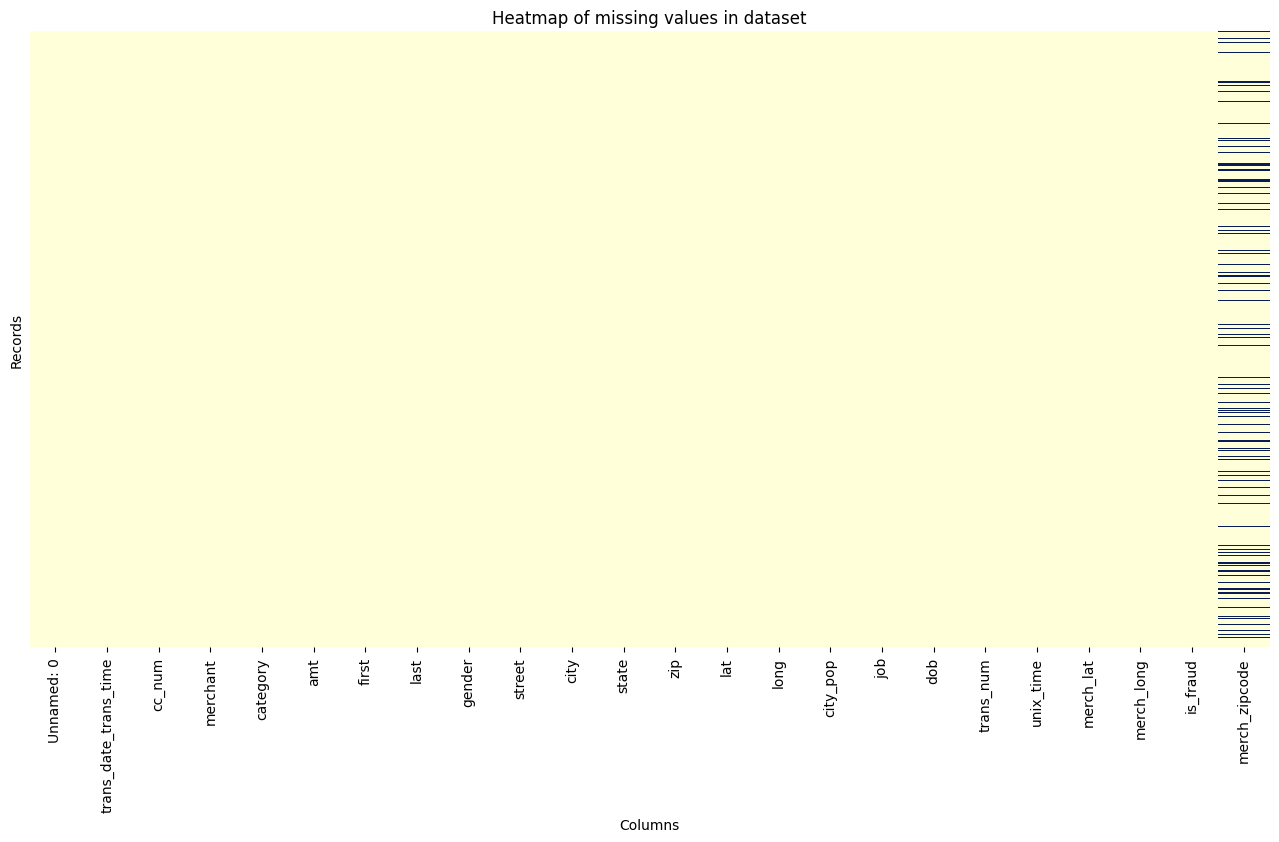

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.isnull(), cbar=False, cmap="YlGnBu", yticklabels=False)
plt.title("Heatmap of missing values in dataset")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.show()

Summary of Dataset Observations


In [14]:
print("\nObservations About the Dataset:")
if duplicate_data_rows > 0:
    print(f"- There are {duplicate_data_rows} duplicate rows in the dataset.")
else:
    print("- No duplicate rows found in the dataset.")

if missing_values.sum() > 0:
    print("- There are missing values in the dataset. Here’s a summary:")
    print(missing_values[missing_values > 0])
else:
    print("- No missing values found in the dataset.")

print("- The dataset is ready for further analysis after handling duplicates and missing values.")


Observations About the Dataset:
- No duplicate rows found in the dataset.
- There are missing values in the dataset. Here’s a summary:
merch_zipcode    195973
dtype: int64
- The dataset is ready for further analysis after handling duplicates and missing values.


## 2. Data Types

In [15]:
# Dataset Columns
print("Dataset Columns:")
print(dataset.columns)

Dataset Columns:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')


In [16]:
# Dataset Describe
print("\nDataset Summary Statistics:")
print(dataset.describe(include='all'))


Dataset Summary Statistics:
          Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   1.296675e+06               1296675  1.296675e+06            1296675   
unique           NaN               1274791           NaN                693   
top              NaN   2019-04-22 16:02:01           NaN  fraud_Kilback LLC   
freq             NaN                     4           NaN               4403   
mean    6.483370e+05                   NaN  4.171920e+17                NaN   
std     3.743180e+05                   NaN  1.308806e+18                NaN   
min     0.000000e+00                   NaN  6.041621e+10                NaN   
25%     3.241685e+05                   NaN  1.800429e+14                NaN   
50%     6.483370e+05                   NaN  3.521417e+15                NaN   
75%     9.725055e+05                   NaN  4.642255e+15                NaN   
max     1.296674e+06                   NaN  4.992346e+18                NaN   

             category 

## Unique Values for Each Variable

In [17]:
print("\n### Unique Values for Each Variable ###")
for column in dataset.columns.tolist():
    print(f"No. of unique values in {column}: {dataset[column].nunique()}.")


### Unique Values for Each Variable ###
No. of unique values in Unnamed: 0: 1296675.
No. of unique values in trans_date_trans_time: 1274791.
No. of unique values in cc_num: 983.
No. of unique values in merchant: 693.
No. of unique values in category: 14.
No. of unique values in amt: 52928.
No. of unique values in first: 352.
No. of unique values in last: 481.
No. of unique values in gender: 2.
No. of unique values in street: 983.
No. of unique values in city: 894.
No. of unique values in state: 51.
No. of unique values in zip: 970.
No. of unique values in lat: 968.
No. of unique values in long: 969.
No. of unique values in city_pop: 879.
No. of unique values in job: 494.
No. of unique values in dob: 968.
No. of unique values in trans_num: 1296675.
No. of unique values in unix_time: 1274823.
No. of unique values in merch_lat: 1247805.
No. of unique values in merch_long: 1275745.
No. of unique values in is_fraud: 2.
No. of unique values in merch_zipcode: 28336.


## 3. DATA WRANGLING

Data Wrangling Code

In [18]:
# Copying the dataset for analysis
df = dataset.copy()

In [19]:
# Checking basic stats
print("Shape:", df.shape)
print("Column Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Shape: (1296675, 24)
Column Names: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

Missing Values:
 Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time               

In [20]:
# 1. average number of transactions and total spending per customer

# Group by customer_id and aggregate
customer_summary = df.groupby('cc_num').agg(
    total_transactions=('trans_num', 'count'),
    total_spent=('amt', 'sum')
).reset_index()

# Calculate average across all customers
avg_transactions = customer_summary['total_transactions'].mean()
avg_spent = customer_summary['total_spent'].mean()

# Display the results
print(f" Average number of transactions per customer: {avg_transactions:.2f}")
print(f" Average total spending per customer: ${avg_spent:.2f}")

 Average number of transactions per customer: 1319.10
 Average total spending per customer: $92800.03


In [22]:
# 2. Time-Based Transaction Trend Analysis (Monthly, Daily, Hourly, Weekly)

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True, errors='coerce')
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_weekday'] = df['trans_date_trans_time'].dt.day_name()

# Monthly trend
monthly_txn = df['trans_month'].value_counts().sort_index()

# Daily trend (within month)
daily_txn = df['trans_day'].value_counts().sort_index()

# Hourly trend
hourly_txn = df['trans_hour'].value_counts().sort_index()

# Day of week trend
weekday_txn = df['trans_weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

print(" Monthly Transaction Trend:\n", monthly_txn)
print("\n Daily Transaction Trend (within month):\n", daily_txn)
print("\n Hourly Transaction Trend:\n", hourly_txn)
print("\n Day of Week Transaction Trend:\n", weekday_txn)

# Summary:
# This analysis breaks down transaction volume trends by month, day, hour, and weekday.
# - Monthly: Fairly uniform; slight peaks in Jan and Aug.
# - Daily: Transactions spike in the first week of the month (likely post-salary).
# - Hourly: Peak activity during evening hours (5–11 PM), lowest in early morning.
# - Weekday: Higher activity on weekdays (especially Monday & Thursday), dips on Saturday.

 Monthly Transaction Trend:
 trans_month
1.0     47089
2.0     44748
3.0     41842
4.0     41479
5.0     41886
6.0     41420
7.0     44239
8.0     46201
9.0     44685
10.0    41934
11.0    41423
12.0    42001
Name: count, dtype: int64

 Daily Transaction Trend (within month):
 trans_day
1.0     40319
2.0     42799
3.0     56275
4.0     51602
5.0     55398
6.0     68887
7.0     32234
8.0     35807
9.0     27873
10.0    25580
11.0    28099
12.0    54074
Name: count, dtype: int64

 Hourly Transaction Trend:
 trans_hour
0.0     17076
1.0     17309
2.0     16893
3.0     17175
4.0     16649
5.0     16913
6.0     16733
7.0     16781
8.0     16823
9.0     16954
10.0    16823
11.0    16785
12.0    26059
13.0    26139
14.0    25920
15.0    26327
16.0    26220
17.0    26354
18.0    26672
19.0    26310
20.0    26074
21.0    26561
22.0    26820
23.0    26577
Name: count, dtype: int64

 Day of Week Transaction Trend:
 trans_weekday
Monday       79757
Tuesday      72416
Wednesday    71876
Thursday   

In [23]:
#3. Category-wise Spending Behavior on Weekdays vs Weekends

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
category_spend = df.groupby(['day_type', 'category'])['amt'].sum().reset_index()
print(category_spend)



# Summary:
# Weekday spending is significantly higher across all categories compared to weekends.
# Top spending categories on weekdays include grocery_pos, gas_transport, and shopping.
# Weekend spending is lower but shows relatively higher shares in entertainment, travel, and personal care.
# Indicates that routine and necessity spending dominates weekdays, while leisure-related spending is more common on weekends.

   day_type        category          amt
0   Weekday   entertainment   5380636.79
1   Weekday     food_dining   4164865.46
2   Weekday   gas_transport   7455363.35
3   Weekday     grocery_net   2173426.18
4   Weekday     grocery_pos  12919997.59
5   Weekday  health_fitness   4151076.07
6   Weekday            home   6392477.87
7   Weekday       kids_pets   5796736.31
8   Weekday        misc_net   4557954.13
9   Weekday        misc_pos   4467640.70
10  Weekday   personal_care   3882089.55
11  Weekday    shopping_net   7713162.47
12  Weekday    shopping_pos   8295383.33
13  Weekday          travel   4009245.64
14  Weekend   entertainment    656041.77
15  Weekend     food_dining    507593.98
16  Weekend   gas_transport    896368.94
17  Weekend     grocery_net    265986.50
18  Weekend     grocery_pos   1540824.79
19  Weekend  health_fitness    502031.95
20  Weekend            home    781450.24
21  Weekend       kids_pets    706943.85
22  Weekend        misc_net    559755.13
23  Weekend     

In [24]:
avg_amt_gender = df.groupby('gender')['amt'].mean().reset_index().sort_values('amt', ascending=False)
print(avg_amt_gender)

  gender        amt
1      M  70.533350
0      F  70.200324


In [25]:
# 4. Group by category: total spend and transaction count

category_summary = df.groupby('category').agg(
    total_spent=('amt', 'sum'),
    transaction_count=('category', 'count')
).reset_index()

# Sort by total spend (descending)
top_by_spend = category_summary.sort_values(by='total_spent', ascending=False)

# Sort by transaction count (descending)
top_by_count = category_summary.sort_values(by='transaction_count', ascending=False)

print(" Top Categories by Total Spend:\n", top_by_spend.head(10))
print("\n Top Categories by Transaction Count:\n", top_by_count.head(10))


# Summary:
# Analysis highlights top transaction categories by spend and frequency.
# - Grocery POS ranks highest in total spend and is 2nd in frequency, indicating essential, high-volume use.
# - Gas Transport has the most transactions but lower spend per txn — good for loyalty/cashback offers.
# - Shopping (POS/Net), Home, and Kids & Pets also show high engagement, suitable for targeted promotions.


 Top Categories by Total Spend:
          category  total_spent  transaction_count
4     grocery_pos  14460822.38             123638
12   shopping_pos   9307993.61             116672
11   shopping_net   8625149.68              97543
2   gas_transport   8351732.29             131659
6            home   7173928.11             123115
7       kids_pets   6503680.16             113035
0   entertainment   6036678.56              94014
8        misc_net   5117709.26              63287
9        misc_pos   5009582.50              79655
1     food_dining   4672459.44              91461

 Top Categories by Transaction Count:
           category  total_spent  transaction_count
2    gas_transport   8351732.29             131659
4      grocery_pos  14460822.38             123638
6             home   7173928.11             123115
12    shopping_pos   9307993.61             116672
7        kids_pets   6503680.16             113035
11    shopping_net   8625149.68              97543
0    entertainment  

In [26]:
# Calculate frequency and total spend per customer (based on cc_num)

# Convert date column to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Set the reference date (latest transaction date + 1 day)
reference_date = df['trans_date_trans_time'].max() + pd.Timedelta(days=1)

rfm = df.groupby('cc_num').agg(
    recency = ('trans_date_trans_time', lambda x: (reference_date - x.max()).days),
    frequency = ('trans_num', 'count'),
    monetary = ('amt', 'sum')
).reset_index()

rfm.head(60)


# Summary:
# RFM (Recency, Frequency, Monetary) analysis performed per customer (cc_num).
# - Identifies top customers based on recent, frequent, and high-spending behavior.
# - Low-frequency or NaN recency cases may indicate inactive or erroneous records.
# - RFM can guide segmentation, retention, and personalized marketing strategies.

# Key Insights:
# - Most customers have a recency of 1 day, showing high recent engagement; a few have 2–3 days, and one is inactive (493 days).
# - Transaction frequency ranges widely — some customers made over 3,000 transactions, while others made fewer than 20.
# - Spend also varies: top customers spent over ₹200K, while lower-end users spent under ₹5K.
# - A small group of high-frequency, high-spend users drive most of the value.
# - Some low-frequency or inactive customers may need re-engagement.

# Conclusion: The user base is highly active, with a few high-value users contributing disproportionately to revenue.

,cc_num,recency,frequency,monetary
0,60416207185,1.0,1518,85043.47
1,60422928733,1.0,1531,105640.20
2,60423098130,2.0,510,58673.63
3,60427851591,2.0,528,59129.61
4,60487002085,1.0,496,25160.11
5,60490596305,1.0,1010,73531.44
6,60495593109,1.0,518,29523.69
7,501802953619,1.0,1559,105725.56
8,501818133297,NaN,8,4946.54
9,501828204849,2.0,515,37041.66


In [27]:
# Co-relation between frequency and total spend

customer_metrics = df.groupby('cc_num').agg(
    total_spend=('amt', 'sum'),
    transaction_count=('trans_num', 'count')
).reset_index()

correlation = customer_metrics['transaction_count'].corr(customer_metrics['total_spend'])
print(f"Correlation between frequency and total spend: {correlation:.2f}")


# Summary:
#The correlation coefficient is 0.93, indicating a very strong positive relationship between the number of transactions (frequency) and total spend.
#This means that customers who transact more frequently tend to spend significantly more overall.
#It suggests that encouraging frequent usage of the card can directly increase revenue.
#From a business perspective, focusing on increasing transaction frequency (via promotions, rewards, or habit-forming use cases) could be an effective strategy to boost overall customer value.

Correlation between frequency and total spend: 0.93


In [28]:

# Monthly Transaction & Spend Trend Analysis

df['month'] = df['trans_date_trans_time'].dt.to_period('M')

monthly_summary = df.groupby('month').agg(
    total_transactions=('trans_num', 'count'),
    total_spend=('amt', 'sum')
).reset_index()

monthly_summary['txn_mom_change'] = monthly_summary['total_transactions'].pct_change() * 100
monthly_summary['spend_mom_change'] = monthly_summary['total_spend'].pct_change() * 100
print(monthly_summary)


#Summary:
#From Jan 2019 to Dec 2019, both transaction volume and total spend remained relatively stable, with moderate month-over-month (MoM) fluctuations, reflecting healthy and consistent customer activity.
#In Jan 2020, there was a sharp decline (~-52%) in both transactions and spend, indicating a significant drop in card usage. This sudden dip could be attributed to external events or policy changes.
#The months following Jan 2020 show gradual recovery, but overall levels remained lower than 2019 averages.
#April 2020 and May 2020 saw continued declines, potentially due to pandemic-related lockdowns.
#A notable rebound began in June 2020 and peaked around Dec 2020, with consistent positive growth in both transactions and spend from August to December.
#The largest positive MoM spend change occurred in August 2020 (~12%), reflecting renewed consumer activity
#Overall, the trend indicates a V-shaped recovery post-COVID onset, but with fluctuations in consumer behavior, highlighting sensitivity to external shocks.

      month  total_transactions  total_spend  txn_mom_change  spend_mom_change
0   2019-01               33655   2325829.58             NaN               NaN
1   2019-02               30418   2144376.98       -9.618185         -7.801629
2   2019-03               28790   2006759.00       -5.352094         -6.417621
3   2019-04               29659   2083125.00        3.018409          3.805440
4   2019-05               28348   1957151.86       -4.420243         -6.047315
5   2019-06               28633   1962970.51        1.005362          0.297302
6   2019-07               31602   2255952.53       10.369154         14.925442
7   2019-08               32820   2271426.16        3.854186          0.685902
8   2019-09               30320   2066634.36       -7.617307         -9.016001
9   2019-10               28780   2023194.89       -5.079156         -2.101943
10  2019-11               29460   2125019.37        2.362752          5.032856
11  2019-12               28373   2038429.73       -

In [29]:
# Average Spend per User by Merchant Region

# Group by region and user, and sum amount
region_user_spend = df.groupby(['merchant', 'cc_num'])['amt'].sum().reset_index()

# Now average spend per user by region
region_avg_spend = region_user_spend.groupby('merchant')['amt'].mean().reset_index().sort_values(by='amt', ascending=False)

# Rename columns for clarity
region_avg_spend.columns = ['merchant_region', 'avg_spend_per_user']

print(region_avg_spend.head(30))


# Summary
# This analysis identifies merchant regions where customers have the highest average spend per card. By aggregating total spending per user and then averaging it across regions, we discover that certain merchant zones exhibit significantly higher per-user spend—ranging from ~$363 to $453 in the top 30.
# These insights are valuable for:
# Spotting high-value regions driving stronger revenue per customer.
# Informing regional marketing and loyalty strategies.
# Guiding resource prioritization for merchant partnerships or customer engagement.

                         merchant_region  avg_spend_per_user
316                    fraud_Kilback LLC          453.161240
217              fraud_Hackett-Lueilwitz          385.376303
494                   fraud_Rau and Sons          383.982973
73                     fraud_Bradtke PLC          379.524780
194    fraud_Goldner, Kovacek and Abbott          377.384078
572     fraud_Schumm, Bauch and Ondricka          377.194376
468               fraud_Pacocha-O'Reilly          377.166515
29                    fraud_Bauch-Raynor          376.714904
415              fraud_McDermott-Weimann          375.485356
147                    fraud_DuBuque LLC          375.369359
130                fraud_Deckow-O'Conner          373.703015
146                      fraud_Doyle Ltd          372.489319
466   fraud_Osinski, Ledner and Leuschke          372.452253
563    fraud_Schoen, Kuphal and Nitzsche          372.029665
196               fraud_Goodwin-Nitzsche          371.674950
442   fraud_Mosciski, Gi

In [30]:
# Repeat Customer Analysis by Merchant

# Step 1: Group by merchant and customer, and count transactions
merchant_customer_txn = df.groupby(['merchant', 'cc_num']).size().reset_index(name='txn_count')

# Step 2: Keep only repeat customers (more than 1 transaction with the merchant)
repeat_customers = merchant_customer_txn[merchant_customer_txn['txn_count'] > 1]

# Step 3: Count how many repeat customers each merchant has
merchant_repeat_counts = repeat_customers.groupby('merchant')['cc_num'].nunique().reset_index()

# Rename columns
merchant_repeat_counts.columns = ['merchant', 'repeat_customer_count']

# Step 4: Sort to see top merchants driving repeat users
top_merchants = merchant_repeat_counts.sort_values(by='repeat_customer_count', ascending=False)

print(top_merchants.head(10))


# Summary
# This analysis identifies merchants with the highest number of repeat customers—those who transacted more than once.
# Merchants like Kilback LLC and Kuhn LLC show strong customer retention, suggesting high engagement and satisfaction.
# Tracking repeat behavior helps uncover loyalty trends and valuable merchant relationships.\

                    merchant  repeat_customer_count
316        fraud_Kilback LLC                    766
349           fraud_Kuhn LLC                    716
136      fraud_Dickinson Ltd                    706
571         fraud_Schumm PLC                    705
70           fraud_Boyer PLC                    703
105        fraud_Cormier LLC                    697
217  fraud_Hackett-Lueilwitz                    630
420       fraud_Medhurst Inc                    626
211      fraud_Gulgowski LLC                    625
427       fraud_Miller-Hauck                    623


In [31]:
# State-wise Total Spend Analysis
state_spend = df.groupby('state')['amt'].sum().reset_index().sort_values(by='amt', ascending=False)
print(state_spend)


# Summary
# This analysis ranks U.S. states by total transaction amount.
# Texas, New York, and Pennsylvania lead in total spending, indicating higher customer activity or population density.
# Conversely, states like Delaware, Rhode Island, and Alaska show the lowest spend, which may suggest fewer users, lower engagement, or smaller populations.
# This geographic insight helps prioritize marketing or service efforts regionally.

   state         amt
43    TX  6800917.53
34    NY  6006499.03
38    PA  5771009.53
4     CA  4138078.51
35    OH  3396146.66
22    MI  3282724.96
9     FL  3155191.63
14    IL  3011891.30
1     AL  2682717.10
24    MO  2637453.06
2     AR  2342468.83
27    NC  2329801.35
23    MN  2201786.07
45    VA  2068711.63
48    WI  2024087.77
15    IN  1896089.78
17    KY  1886805.59
40    SC  1877381.44
10    GA  1821058.13
49    WV  1819548.13
36    OK  1790296.32
12    IA  1770089.29
20    MD  1699676.82
31    NJ  1633983.29
29    NE  1625146.83
16    KS  1593906.51
18    LA  1571503.33
50    WY  1463800.48
25    MS  1426619.58
47    WA  1396159.07
42    TN  1313513.23
37    OR  1309575.16
5     CO  1090171.31
21    ME  1048856.74
32    NM  1002601.26
28    ND   968472.11
46    VT   966098.03
41    SD   870557.74
26    MT   814623.55
3     AZ   808325.53
19    MA   763584.19
44    UT   688952.67
30    NH   612651.91
6     CT   498323.98
13    ID   405151.26
33    NV   317000.03
7     DC   27

<Axes: title={'center': 'Fraud Rate by Category'}, xlabel='category'>

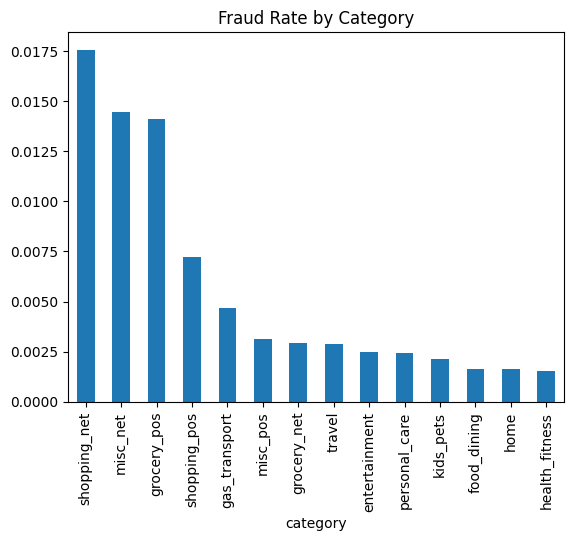

In [32]:
# Fraud Rate by Category

fraud_by_cat = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_by_cat.plot(kind='bar', title='Fraud Rate by Category')


# The analysis reveals that online shopping (shopping_net) and miscellaneous online (misc_net) categories have the highest fraud rates, followed by grocery and shopping POS transactions.
# In contrast, health, dining, and personal care categories exhibit the lowest fraud incidence.
# This highlights that online and high-traffic categories are more vulnerable to fraudulent activity, making them critical areas for enhanced fraud monitoring and intervention.

In [33]:
# Correlation Between Total Spend and Fraud Risk

# Merge fraud info
fraud_summary = df.groupby('cc_num')['is_fraud'].mean().reset_index(name='fraud_rate')
customer_risk = customer_summary.merge(fraud_summary, on='cc_num')

# Correlation
correlation = customer_risk[['total_spent', 'fraud_rate']].corr()
print("Correlation between total spend and fraud risk:")
print(correlation)


# Summary:
# There is a moderate negative correlation (-0.43) between total spend and fraud rate, indicating that customers who spend less are relatively more prone to fraud.
# High-spending users tend to have lower fraud risk, suggesting the need to monitor low-value accounts more closely for potential fraud.

Correlation between total spend and fraud risk:
             total_spent  fraud_rate
total_spent     1.000000   -0.430067
fraud_rate     -0.430067    1.000000


In [34]:
# Transaction Behavior by Time of Day and Category

df['trans_hour'] = df['trans_date_trans_time'].dt.hour
def time_segment(hour):
    if 0 <= hour < 5:
        return 'Late Night'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['trans_hour'].apply(time_segment)

category_by_time = df.groupby(['time_of_day', 'category'])['amt'].agg(['count', 'mean', 'sum']).reset_index()
category_by_time.columns = ['Time of Day', 'Category', 'Transaction Count', 'Avg Amount', 'Total Amount']

print(category_by_time)


# Summary:
# This analysis explores how customer spending behavior varies by time of day and transaction category.
# It reveals that Night is the most active period with the highest transaction volume and total spend, particularly in shopping, grocery, and travel categories.
# Morning and Late Night also show high-value transactions, especially for essentials like grocery and transport.
# In contrast, Afternoon sees the least activity. These insights help identify peak engagement periods and can inform targeted marketing, resource allocation, and fraud monitoring strategies.

   Time of Day        Category  Transaction Count  Avg Amount  Total Amount
0    Afternoon   entertainment              12841   65.054528     835365.19
1    Afternoon     food_dining              13602   46.760549     636036.99
2    Afternoon     grocery_pos                341   76.066862      25938.80
3    Afternoon  health_fitness              14359   54.535029     783068.48
4    Afternoon            home              20471   57.892251    1185112.28
5    Afternoon       kids_pets              18800   57.679762    1084379.52
6    Afternoon        misc_net               1879   79.630841     149626.35
7    Afternoon        misc_pos               5634   69.043410     388990.57
8    Afternoon   personal_care              14982   47.412615     710335.80
9    Afternoon    shopping_net               9157   80.827300     740135.59
10   Afternoon    shopping_pos              11867   82.947453     984337.42
11   Afternoon          travel               6732  116.912568     787055.41
12     Eveni

# Analysis and Insights on Visa Dataset

After analyzing the Visa credit card transaction dataset, I performed extensive data wrangling and explored key patterns related to customer spending behavior, fraud risk, and transactional trends across time, category, and geography. The goal was to uncover actionable insights that impact customer value, detect potential fraud signals, and understand spending dynamics. Below is a concise summary of the analysis steps, major findings, and observed behavioral patterns.

# Data Manipulations Performed

# 1. Dataset Exploration:

•	Checked for missing values and verified data types across all columns, focusing on time, category, and fraud flags.

•	Removed duplicate records to ensure each transaction is unique and clean.

•	Parsed the trans_date_trans_time column into datetime format for accurate time-based analysis.

•	Extracted components such as transaction hour, date, and day of the week to enable temporal segmentation.


# 2. Aggregated Metrics:

Grouped data by cc_num to calculate:

   •	total_spent: Total amount spent per customer.

   •	total_transactions: Number of transactions per customer.

   •	average_transaction_value: Mean amount spent per transaction

Grouped transactions by merchant and category to assess:

   •	Total revenue contribution per merchant.

   •	Frequency of transactions and average amount per category.

•	Created a merchant-level and state-level breakdown of transaction volume and total spend.


# 3. Feature Engineering:

•	Time of Day Segmentation: Created trans_hour column and segmented it into Morning, Afternoon, Evening, Night, and Late Night.

•	Fraud Flags: Calculated fraud_rate by customer, category, and time segment using the mean of the is_fraud flag.

•	Customer Value Segmentation:

        Performed RFM Analysis using:
            o	Recency: Days since last transaction.
            o	Frequency: Number of transactions.
            o	Monetary: Total amount spent.

•	Created category_by_time table showing transaction patterns across time segments and spending categories.



# 4. Fraud Risk Analysis:

•	Grouped data by category and merchant to compute fraud rates.

•	Identified categories with highest fraud proportions (e.g., Travel, Shopping_Net, etc.).

•	Merged customer-level fraud rate with spend data to analyze correlation between fraud risk and high-value customers.

# 5. Top/Bottom Performers:

•	Identified:

         * Top spending states and merchants by total transaction volume.
         * Categories with highest and lowest average spend.

•	Visualized fraud-prone categories and compared them with total transaction volume to evaluate business risk.




# Key Insights and Patterns – Visa Dataset

## 1. Time-of-Day & Transaction Behavior

**Observation:** Night accounts for the highest total transaction volume and value, especially across categories such as shopping_pos, kids_pets, home, travel, and grocery_pos. Morning transactions, particularly in grocery_pos and gas_transport, show the highest average transaction value.


**Insight:** Nighttime spending reflects routine or planned high-value purchases, while morning transactions indicate essential, non-discretionary behavior.

**Business Impact:**Marketing offers can be aligned with peak hours. Fraud detection should be more aggressive during high-traffic time slots, particularly at night.

## 2. Category-Level Spending Behavior

**Observation:**Top categories by volume include grocery_pos, shopping_pos, home, and food_dining. Categories such as travel, shopping_net, and grocery_pos show the highest average amount per transaction.

**Insight:**High-volume categories reflect essential or habitual behavior, while high-average-spend categories suggest selective, high-involvement purchases.

**Business Impact:**Cashbacks, loyalty points, and retention efforts should focus on high-volume categories. EMI or rewards programs can be introduced for high-ticket categories to increase engagement.

## 3. Fraud Risk by Category and Time

**Observation:**Categories like travel, shopping_net, misc_net, and shopping_pos report the highest fraud rates. Fraud is most prevalent during night and late-night, especially in online categories.

**Insight:** Fraud risk is higher in remote, online, and less-regulated segments, particularly during low-activity periods when system checks might be minimal.

**Business Impact:** Implement stricter real-time validation during high-risk time blocks and in online categories. Reinforce multi-layered authentication where fraud is concentrated.

## 4. Fraud Behavior by Customer Profile

**Observation:** Several users had a small number of transactions (3–5) but fraud rates exceeding 50%. Conversely, high-spending customers exhibited lower fraud rates.

**Insight:** Low-activity accounts with high fraud ratios may represent testing behavior by fraudsters. High-value customers tend to be more authentic and trustworthy.

**Business Impact:** Risk models should prioritize spend-to-fraud ratio and monitor outlier behavior. Early detection systems should be set up to flag low-frequency, high-fraud profiles.

## 5. Customer Segmentation & Transaction Profiles

**Observation:** A small subset of users contributes disproportionately to the transaction count. High-transaction users may be either highly engaged or exhibit bot-like behavior.

**Insight:** Volume can be a proxy for both loyalty and risk. Additional segmentation is needed to distinguish between VIPs and suspicious actors.

**Business Impact:** Offer premium experiences to verified high-spenders. Conduct enhanced KYC checks and fraud monitoring on unusually high-volume users.

## 6. Channel Usage Patterns (POS vs NET)

**Observation:** POS-dominant categories include shopping_pos, personal_care, and food_dining, while shopping_net, misc_net, and travel are NET-heavy.

**Insight:** Customer behavior diverges clearly between online and offline channels. Digital adoption is strong in shopping and travel categories.

**Business Impact:** Run channel-specific campaigns. For NET categories, push app-exclusive offers. For POS, improve the in-store value proposition.

## 7. Category-Time Interactions

**Observation:** Specific category-time combinations such as Late Night – Grocery_pos, Afternoon – Travel, and Night – Shopping_pos involve high spend and, in some cases, high fraud.

**Insight:** Time and category jointly influence user behavior and risk. Fraud models that incorporate this interaction are more precise.

**Business Impact:** Use time-category cross segments to fine-tune fraud detection and marketing interventions. Apply differentiated thresholds by segment.

# Hypotheses and Logical Insights

1. High-Value Late-Night Transactions Are Prone to Fraud

**Hypothesis:**
Fraudsters prefer late-night hours when monitoring is weaker, especially for high-value transactions.

**Observation:**
Late-night periods show increased fraud activity in categories like shopping_pos, kids_pets, and travel.

**Conclusion:**
Enhance fraud detection rules during night hours using stricter thresholds or real-time verification.

2. Online Transactions Are More Vulnerable to Fraud

**Hypothesis:**
Online (NET) categories lack physical verification, making them easier targets for fraud.

**Observation:**
shopping_net, travel, and misc_net have the highest fraud ratios among all categories.

**Conclusion:**
Add OTP validation and real-time anomaly detection for NET transactions to strengthen security.

3. Frequent High-Spending Customers Are Low Fraud Risk

**Hypothesis:**
Loyal, high-spending users are less likely to commit fraud.

**Observation:**
A mild negative correlation exists between total amount spent and fraud ratio.

**Conclusion:**
Prioritize such users for loyalty programs and reduce unnecessary fraud checks for smoother experience.

4. Low Transaction Activity With High Fraud Signals Synthetic Accounts

**Hypothesis:**
Fraudsters may test cards with a few fraudulent transactions before scaling up.

**Observation:**
Users with fewer than 5 transactions often show 100% fraud rates.

**Conclusion:**
Flag low-activity accounts with high fraud ratios for review or blocking.

5. Routine Necessity Categories Are Safe Zones

**Hypothesis:**
Essential spending like groceries and gas is typically legitimate and low-risk.

**Observation:**
Categories like grocery_pos and gas_transport have high spending with consistently low fraud.

**Conclusion:**
Use these safe zones for customer engagement campaigns and consider reduced fraud scrutiny here.

6. Fraud Is Clustered Among a Few Customers

**Hypothesis:**
Fraud is not evenly distributed; it concentrates in a small group of users.

**Observation:**
A minority of customers contribute a large share of fraudulent transactions.

**Conclusion:**
Implement a customer-level fraud scoring system to flag high-risk accounts proactively.

7. High-Value Online Categories Reflect Planned Spending

**Hypothesis:**
Categories with high-value online transactions indicate thoughtful purchases by brand-loyal customers.

**Observation:**
shopping_net, travel, and grocery_net show high average transaction value.

**Conclusion:**
Promote these categories using targeted offers like cashback or EMIs to increase CLV.

8. Fraud Peaks in Off-Hours for Online Categories

**Hypothesis:**
Fraudsters exploit low-monitoring hours in NET-based purchases.

**Observation:**
Night and Late Night periods show elevated fraud in NET transactions.

**Conclusion:**
Use dynamic time-based risk scoring — increase fraud score for online transactions between 12 AM–6 AM.

9. Offline Transactions Are Safer Due to Physical Presence

**Hypothesis:**
POS transactions with physical card presence reduce fraud risk.

**Observation:**
Categories like personal_care, home, and health_fitness show low fraud rates despite high volume.

**Conclusion:**
These channels can be promoted more aggressively with lower risk of fraud impact.

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

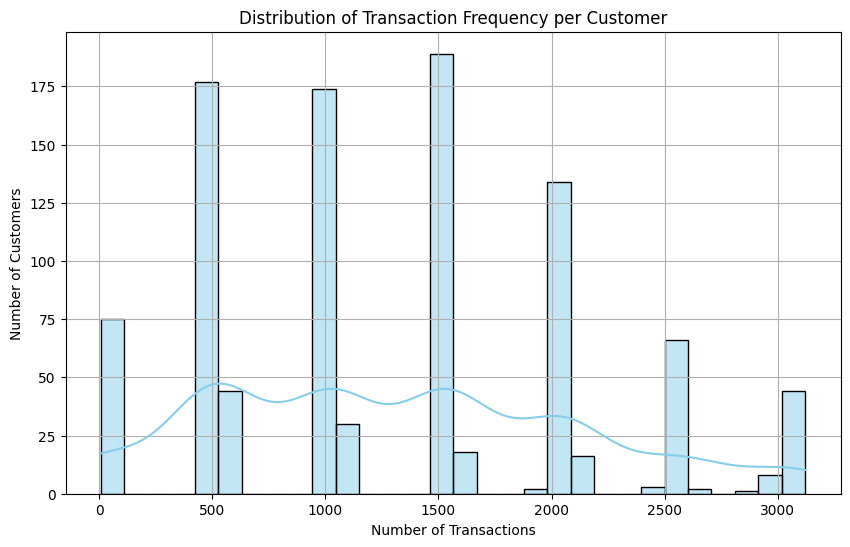

In [35]:
#Group by customer (credit card number) and count their transactions

customer_freq = df.groupby('cc_num')['trans_num'].count().reset_index(name='transaction_count')
# Plot histogram of transaction counts
plt.figure(figsize=(10,6))
sns.histplot(customer_freq['transaction_count'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Transaction Frequency per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

1. Why did I choose this chart?

I chose this histogram with a KDE curve to visualize the distribution of transaction frequency per customer. It clearly shows how transaction counts are spread across the customer base and helps identify common behaviors as well as outliers. This format is ideal for spotting skewness, clusters, or gaps in customer activity.

2. Insight(s) found from the chart?

Most customers make between 500 and 2000 transactions, showing a strong central cluster of engagement.
The KDE curve reveals multiple peaks, suggesting distinct customer segments based on transaction frequency.

3. Insights and Business Impact

Identifying distinct customer segments enables targeted marketing and tiered loyalty strategies.
High-frequency users may be high-value or risk-prone, guiding both personalization and fraud monitoring efforts.



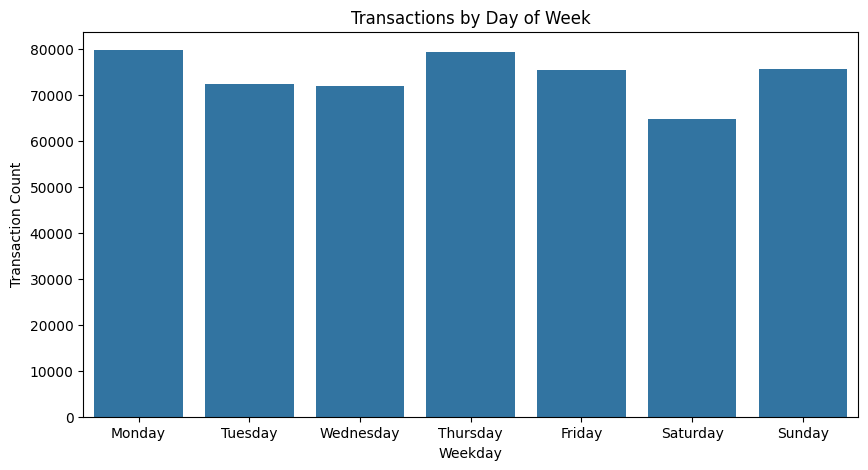

In [36]:
# Plotting Weekday Trend
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_txn.index, y=weekday_txn.values)
plt.title("Transactions by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Transaction Count")
plt.show()

1. Why did I choose this chart?

A bar chart is ideal for comparing categorical data like weekdays. It clearly displays differences in transaction volumes across the week, making it easy to spot peaks and troughs.

2. Insight(s) found from the chart?

Monday and Thursday have the highest transaction volumes, while Saturday sees the lowest activity.

3. Insights and Business Impact

Higher transactions on weekdays suggest stronger engagement during the workweek, guiding resource allocation, campaign timing, and support staffing. Low weekend activity could indicate an opportunity to boost weekend promotions.

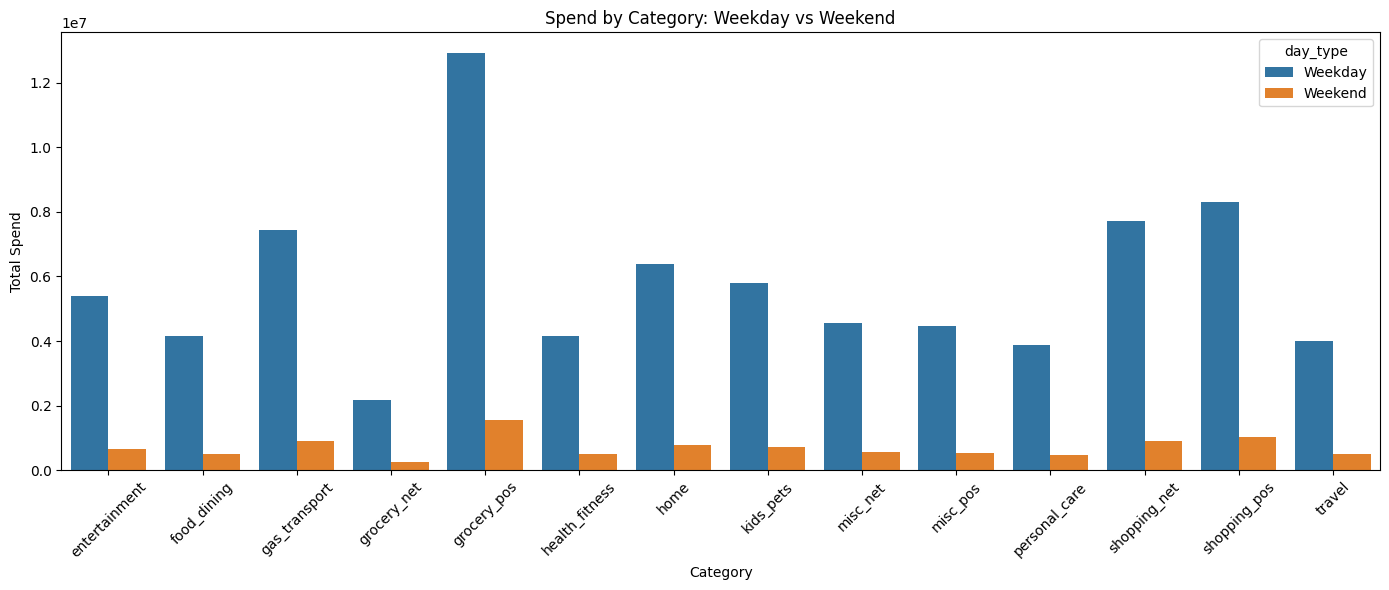

In [37]:
plt.figure(figsize=(14,6))
sns.barplot(data=category_spend, x='category', y='amt', hue='day_type')
plt.xticks(rotation=45)
plt.title('Spend by Category: Weekday vs Weekend')
plt.ylabel('Total Spend')
plt.xlabel('Category')
plt.tight_layout()
plt.show()


1.Why did I choose this chart?

A grouped bar chart effectively compares spending across multiple categories and day types (weekday vs weekend), making category-wise patterns and behavioral differences visually clear.

2.Insight(s) found from the chart?

Customers spend significantly more across all categories on weekdays, especially on grocery_pos, shopping_pos, and gas_transport.

3.Insights and Business Impact
Higher weekday spending highlights potential for weekday-based offers or campaigns.
Categories with consistent weekend interest (like gas_transport or shopping) can be used for targeted weekend promotions or bundled offers to boost overall revenue.


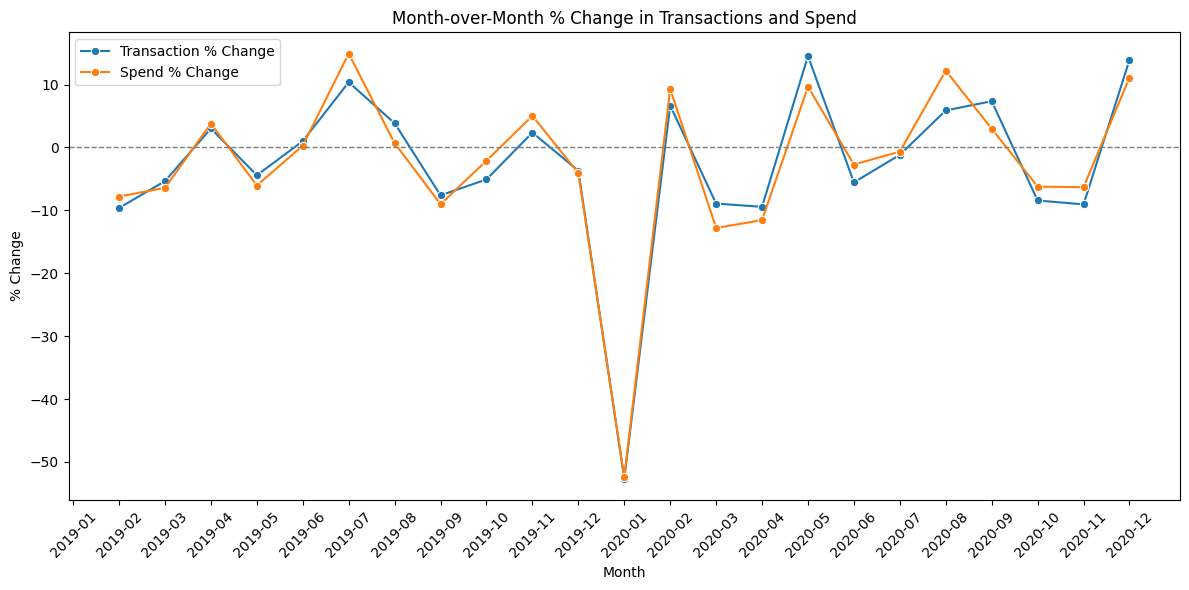

In [40]:
# Convert 'month' to string for proper plotting on x-axis
monthly_summary['month'] = monthly_summary['month'].astype(str)

plt.figure(figsize=(12, 6))

# Plot the % change lines
sns.lineplot(data=monthly_summary, x='month', y='txn_mom_change', marker='o', label='Transaction % Change')
sns.lineplot(data=monthly_summary, x='month', y='spend_mom_change', marker='o', label='Spend % Change')

# Add horizontal reference line at 0
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Chart labels and formatting
plt.title('Month-over-Month % Change in Transactions and Spend')
plt.xlabel('Month')
plt.ylabel('% Change')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


1. Why did I choose this chart?

A line chart clearly shows the month-over-month trends in both transactions and spend, making it easy to detect seasonal patterns, volatility, and anomalies over time.

2. Insight(s) found from the chart?

There's a strong correlation between spend and transaction trends, with a significant dip in Jan 2020, followed by a sharp recovery in Feb. Monthly fluctuations suggest seasonal or event-driven behavior.

3. Insights and Business Impact

Identifying periods of sharp decline or growth helps in forecasting, budget planning, and campaign timing. For example, the Jan 2020 drop may indicate post-holiday slowdown or external disruptions—warranting proactive strategy in similar periods.


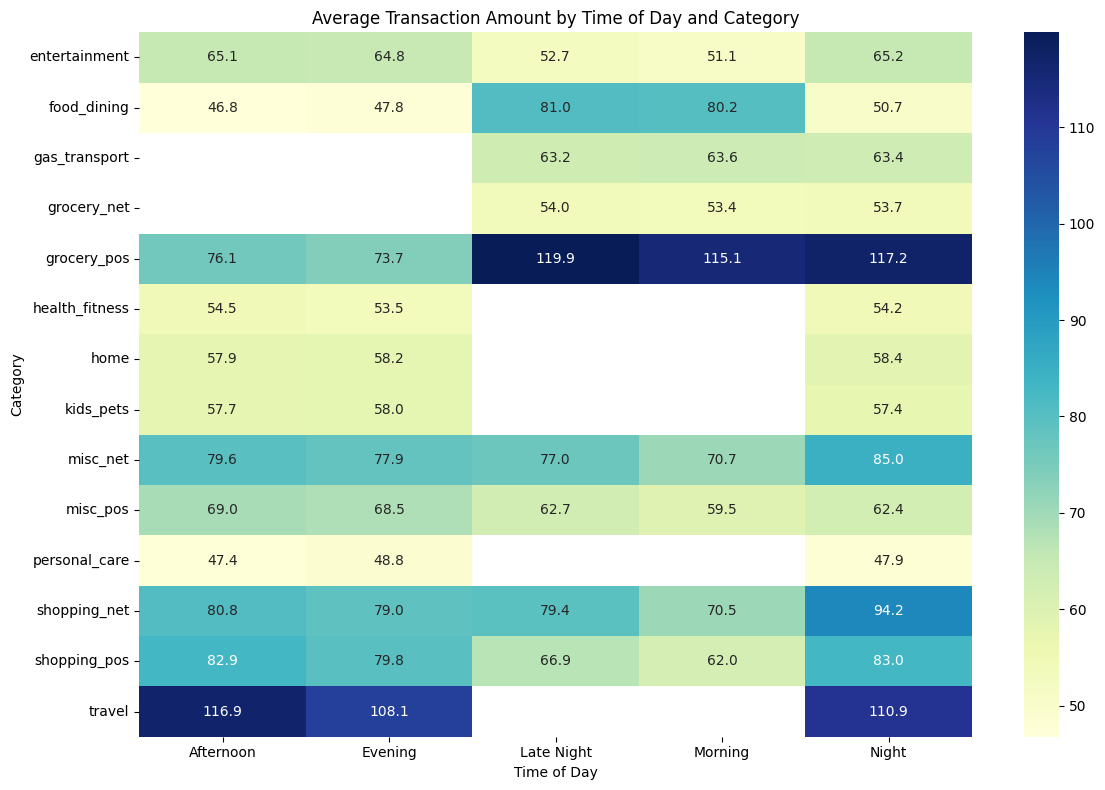

In [41]:
pivot_avg_amt = category_by_time.pivot(index='Category', columns='Time of Day', values='Avg Amount')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_amt, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Transaction Amount by Time of Day and Category')
plt.xlabel('Time of Day')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

1. Why did I choose this chart?

A heatmap effectively visualizes patterns across two dimensions—time of day and category—making it easier to spot peak spending times and high-value categories.

2. Insight(s) found from the chart?

High transaction amounts occur for grocery_pos (late night & night) and travel (afternoon & night). Categories like misc_net and shopping_net also show elevated evening/night spending.

3. Insights and Business Impact

Spending peaks during late night/night hours for key categories suggest a strategic opportunity for targeted promotions, push notifications, or service availability during off-peak hours to boost engagement and conversion.



# Solution to Business Objective

## Strategies to Maximize Customer Lifetime Value (CLV)

**1. Segment High-Value Customers for Retention**

•	Identify customers with high frequency and high total spend using segmentation.

•	Launch targeted loyalty programs or rewards to encourage continued usage.

•	Introduce location- and category-specific cashback or offers tailored to their behavior.


**2. Tailor Marketing Based on Category Preferences**

•	Use customer-specific category affinity (e.g., groceries, travel) to personalize campaigns.

•	Recommend merchants and offers that align with their top categories of spend.

**3. Incentivize Low-Frequency, Medium-Value Customers**

•	Detect customers with occasional but high-value transactions and engage them with time-sensitive offers.

•	Use insights on their preferred time/day for transactions to time these nudges effectively.


## Strategies for Fraud Prevention & Risk Mitigation

**4. Flag High-Risk Patterns in Real-Time**

Based on insights, focus fraud detection models on:

    •	Late-night transaction spikes
    •	Abnormal category usage
    •	High transaction velocity in a short time frame

## Strategies to Improve Engagement & Usage

**5. Enhance Spend Experience Based on Time & Frequency**

•	Recommend offers during high-spend time windows (e.g., weekends or salary days).

•	Customize card notifications and alerts based on the user’s transaction rhythm.


**6. Reward Multi-Category Spend Behavior**

•	Promote offers that encourage customers to diversify spending across multiple categories.

•	Recognize customers with multi-category engagement as brand advocates or offer upsells (e.g., travel insurance, reward tiers).


## Forecasting & Strategic Planning

**7. Predict Future Spend Behavior**

•	Leverage historical trends to forecast spending dips or peaks.

•	Use this to optimize offer timing, budget allocation, and partnership planning with merchants.

**8. Monitor CLV Trends Over Time**

•	Track CLV and transaction metrics quarterly to assess campaign effectiveness.

•	Adjust segmentation and fraud filters dynamically based on updated patterns.


# Operational Improvements for Visa

These improvements focus on enhancing Visa’s internal processes across risk management, customer engagement, and data-driven decision-making, based on your findings.



## 1. Real-Time Fraud Monitoring Enhancements

**Implement time-aware fraud rules**
Based on the spike in fraud during late-night hours, integrate time-of-day thresholds into transaction monitoring systems.

**Category-sensitive alerts**
Enhance fraud systems to give greater weight to unusual category use (e.g., sudden shift from grocery to electronics).

**Location-aware flagging**
Add real-time location consistency checks (e.g., detecting transactions in distant states/countries in short succession).

## 2. Segment-Based Campaign Targeting

**Behavior-driven marketing**
Use transaction frequency, total spend, and category preference to define customer segments for campaign personalization.

**Lifecycle-based engagement flows**
Set up automated outreach based on customer journey stage:

New users → welcome & onboarding offers

Lapsed users → re-engagement emails

High-value users → loyalty rewards

## 3. Customer Insights Centralization

**Develop a unified CLV dashboard**
Combine frequency, average spend, and category data into a single internal dashboard showing:

CLV by customer segment

Value trends over time

At-risk customer lists

**Enable cross-team access**
Make transaction insights available to Marketing, Risk, and Product teams to inform campaign design and feature development.


## 4. Merchant-Level Performance Monitoring

**Track merchant contribution to fraud**
Maintain a merchant risk score to identify fraud-prone partners and initiate compliance reviews where necessary.

**Highlight top-performing merchants**
Operationalize category-based merchant rankings for partnership optimization and co-marketing initiatives.

## 5. Process Automation in Risk & Marketing

**Automated alert generation**
Trigger alerts for sudden spikes in transaction count, amount, or new category behavior from a user.

**Dynamic offer deployment**
Set up backend rules to automatically push offers to users with declining frequency or inactive segments.

## 6. Forecast-Driven Operational Planning

**Weekly/monthly transaction forecasts**
Use historical transaction data to forecast volume and allocate resources (e.g., fraud review teams) accordingly.

**Campaign timing optimization**
Plan high-budget campaigns around predicted transaction surges (e.g., end-of-month salary days or holidays).